In [1]:
!nvidia-smi

Wed Mar  6 10:14:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API")
project = rf.workspace("ipv-investigacao").project("wildfire-detection-5odum")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildfire-Detection-3 in yolov8:: 100%|██████████| 6232/6232 [00:01<00:00, 5982.70it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 lr0=0.001 degrees=10.0 translate=0.1 shear=10.0 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 152MB/s]
New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Wildfire-Detection-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, st

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1709720137.3dbf125802cc.16235.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch5240.jpg  weights
P_curve.png					     train_batch5241.jpg
PR_curve.png					     train_batch5242.jpg


/content


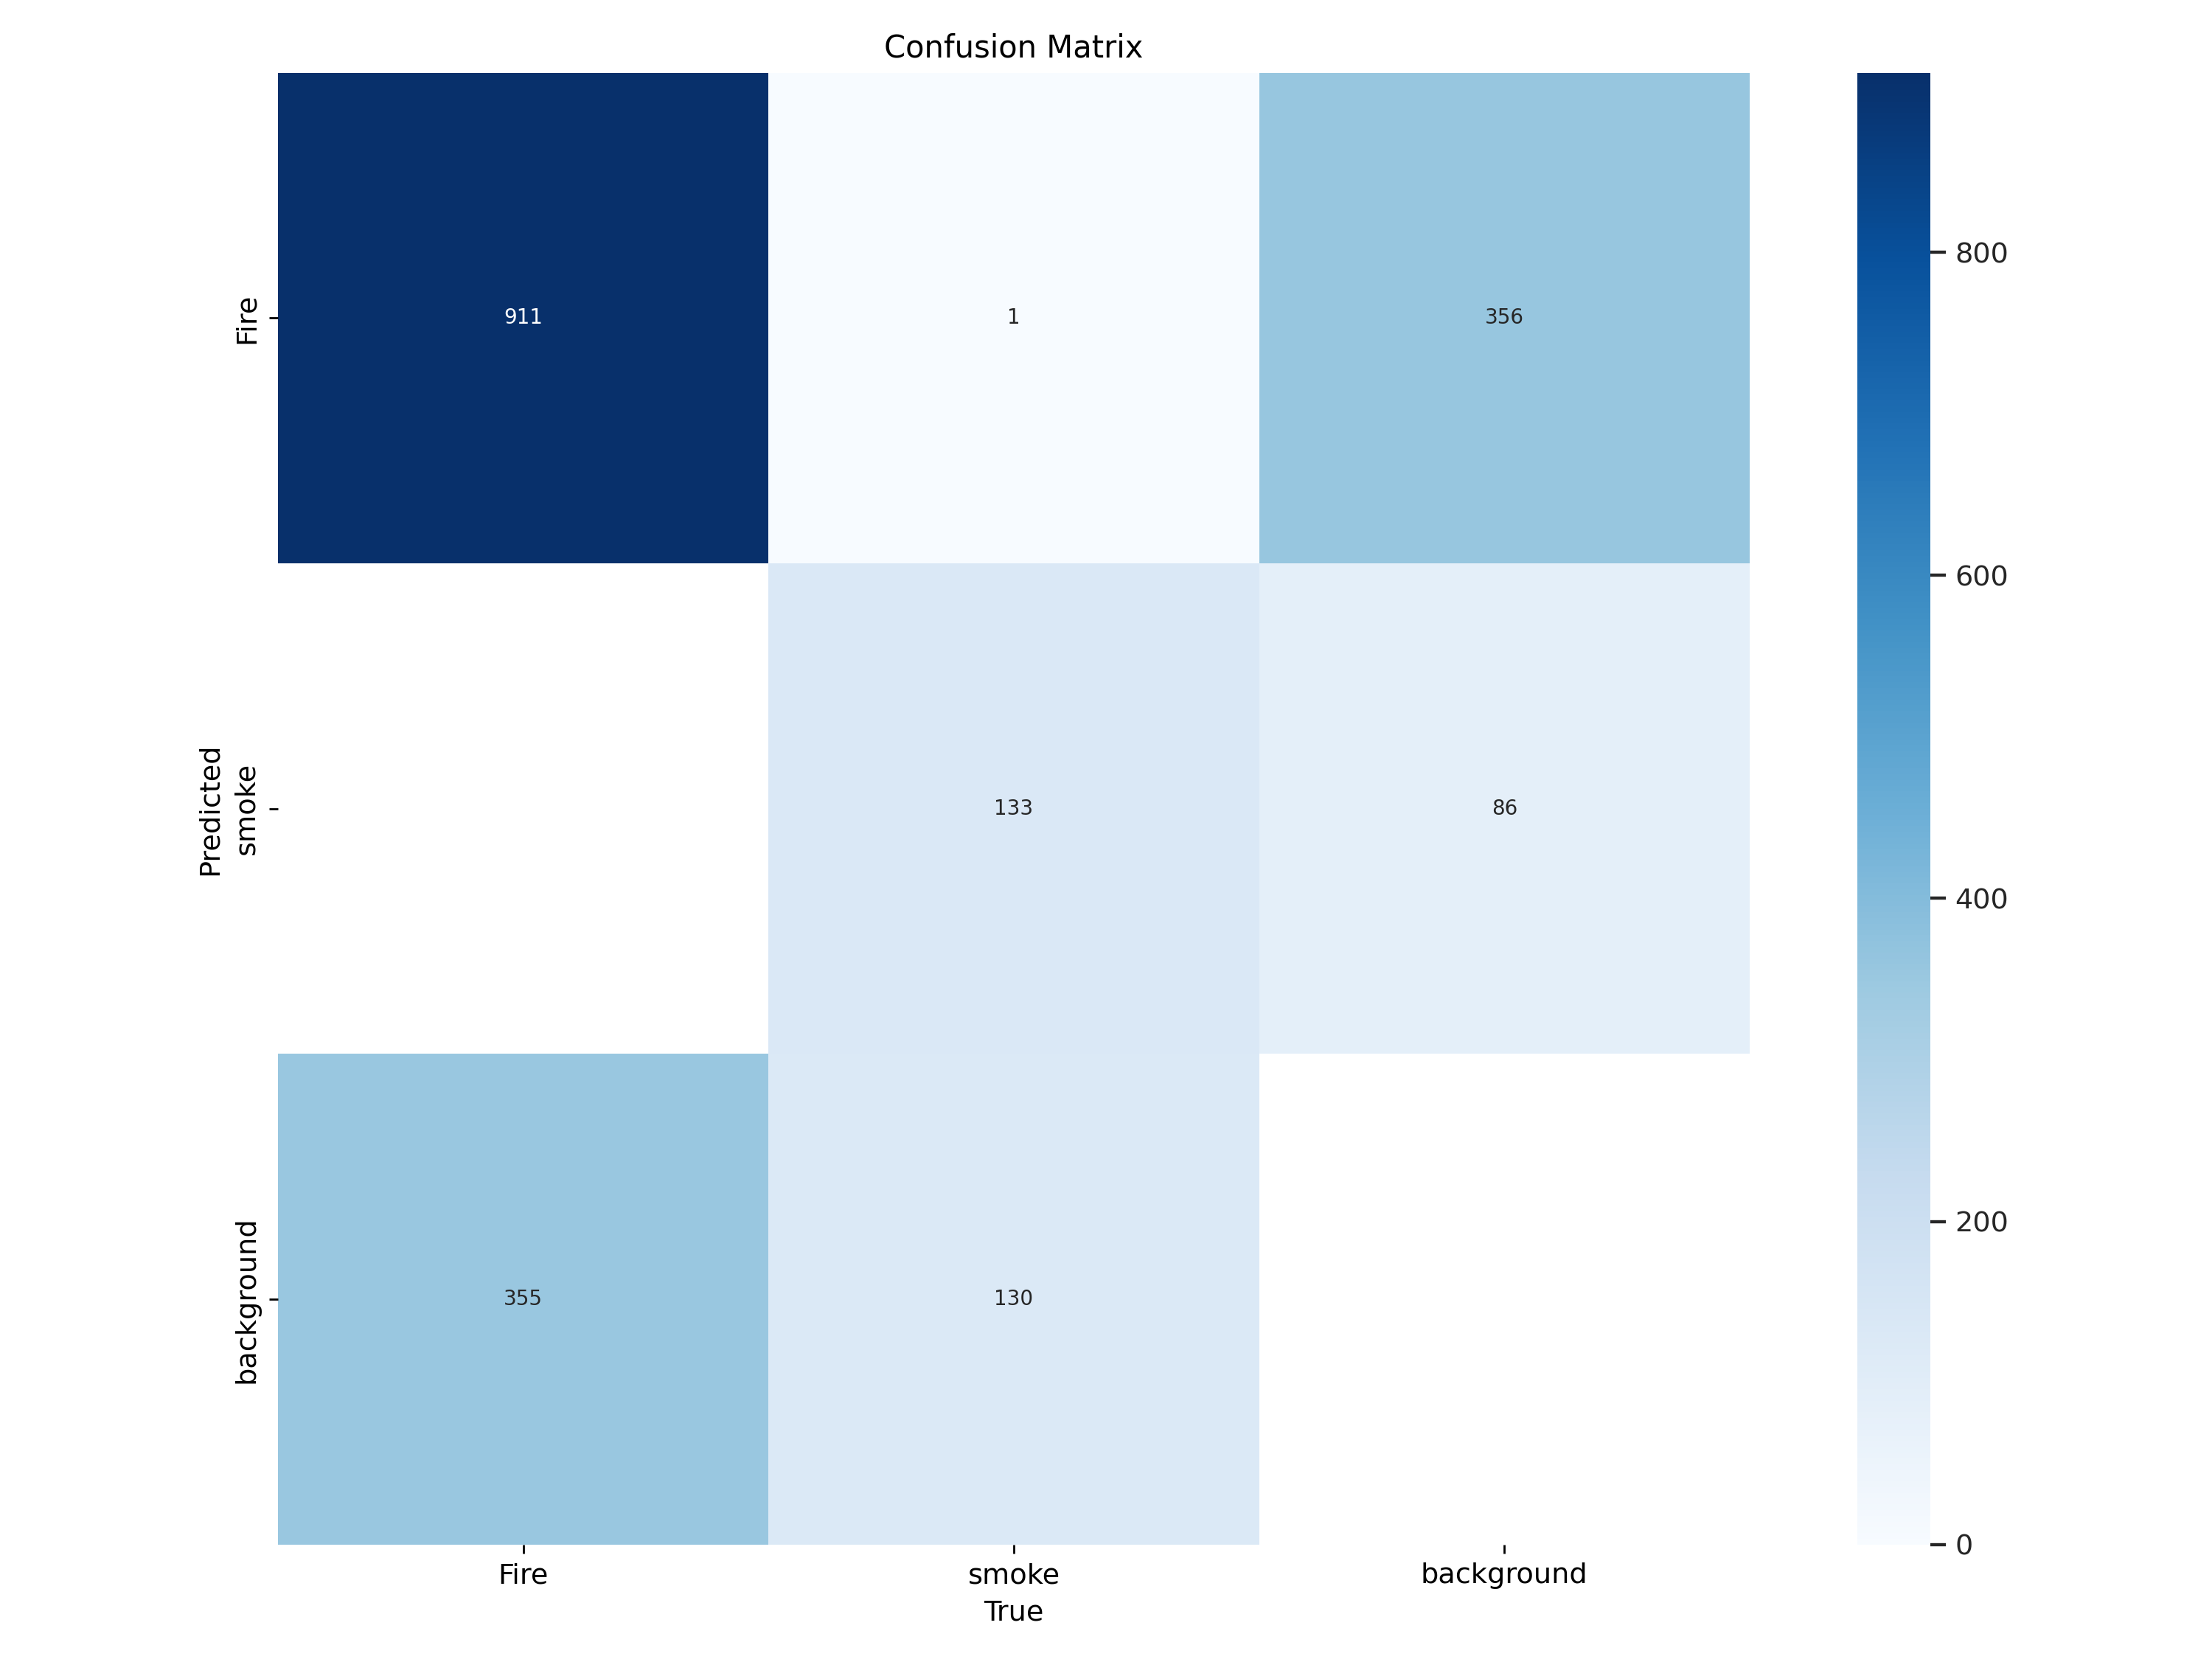

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


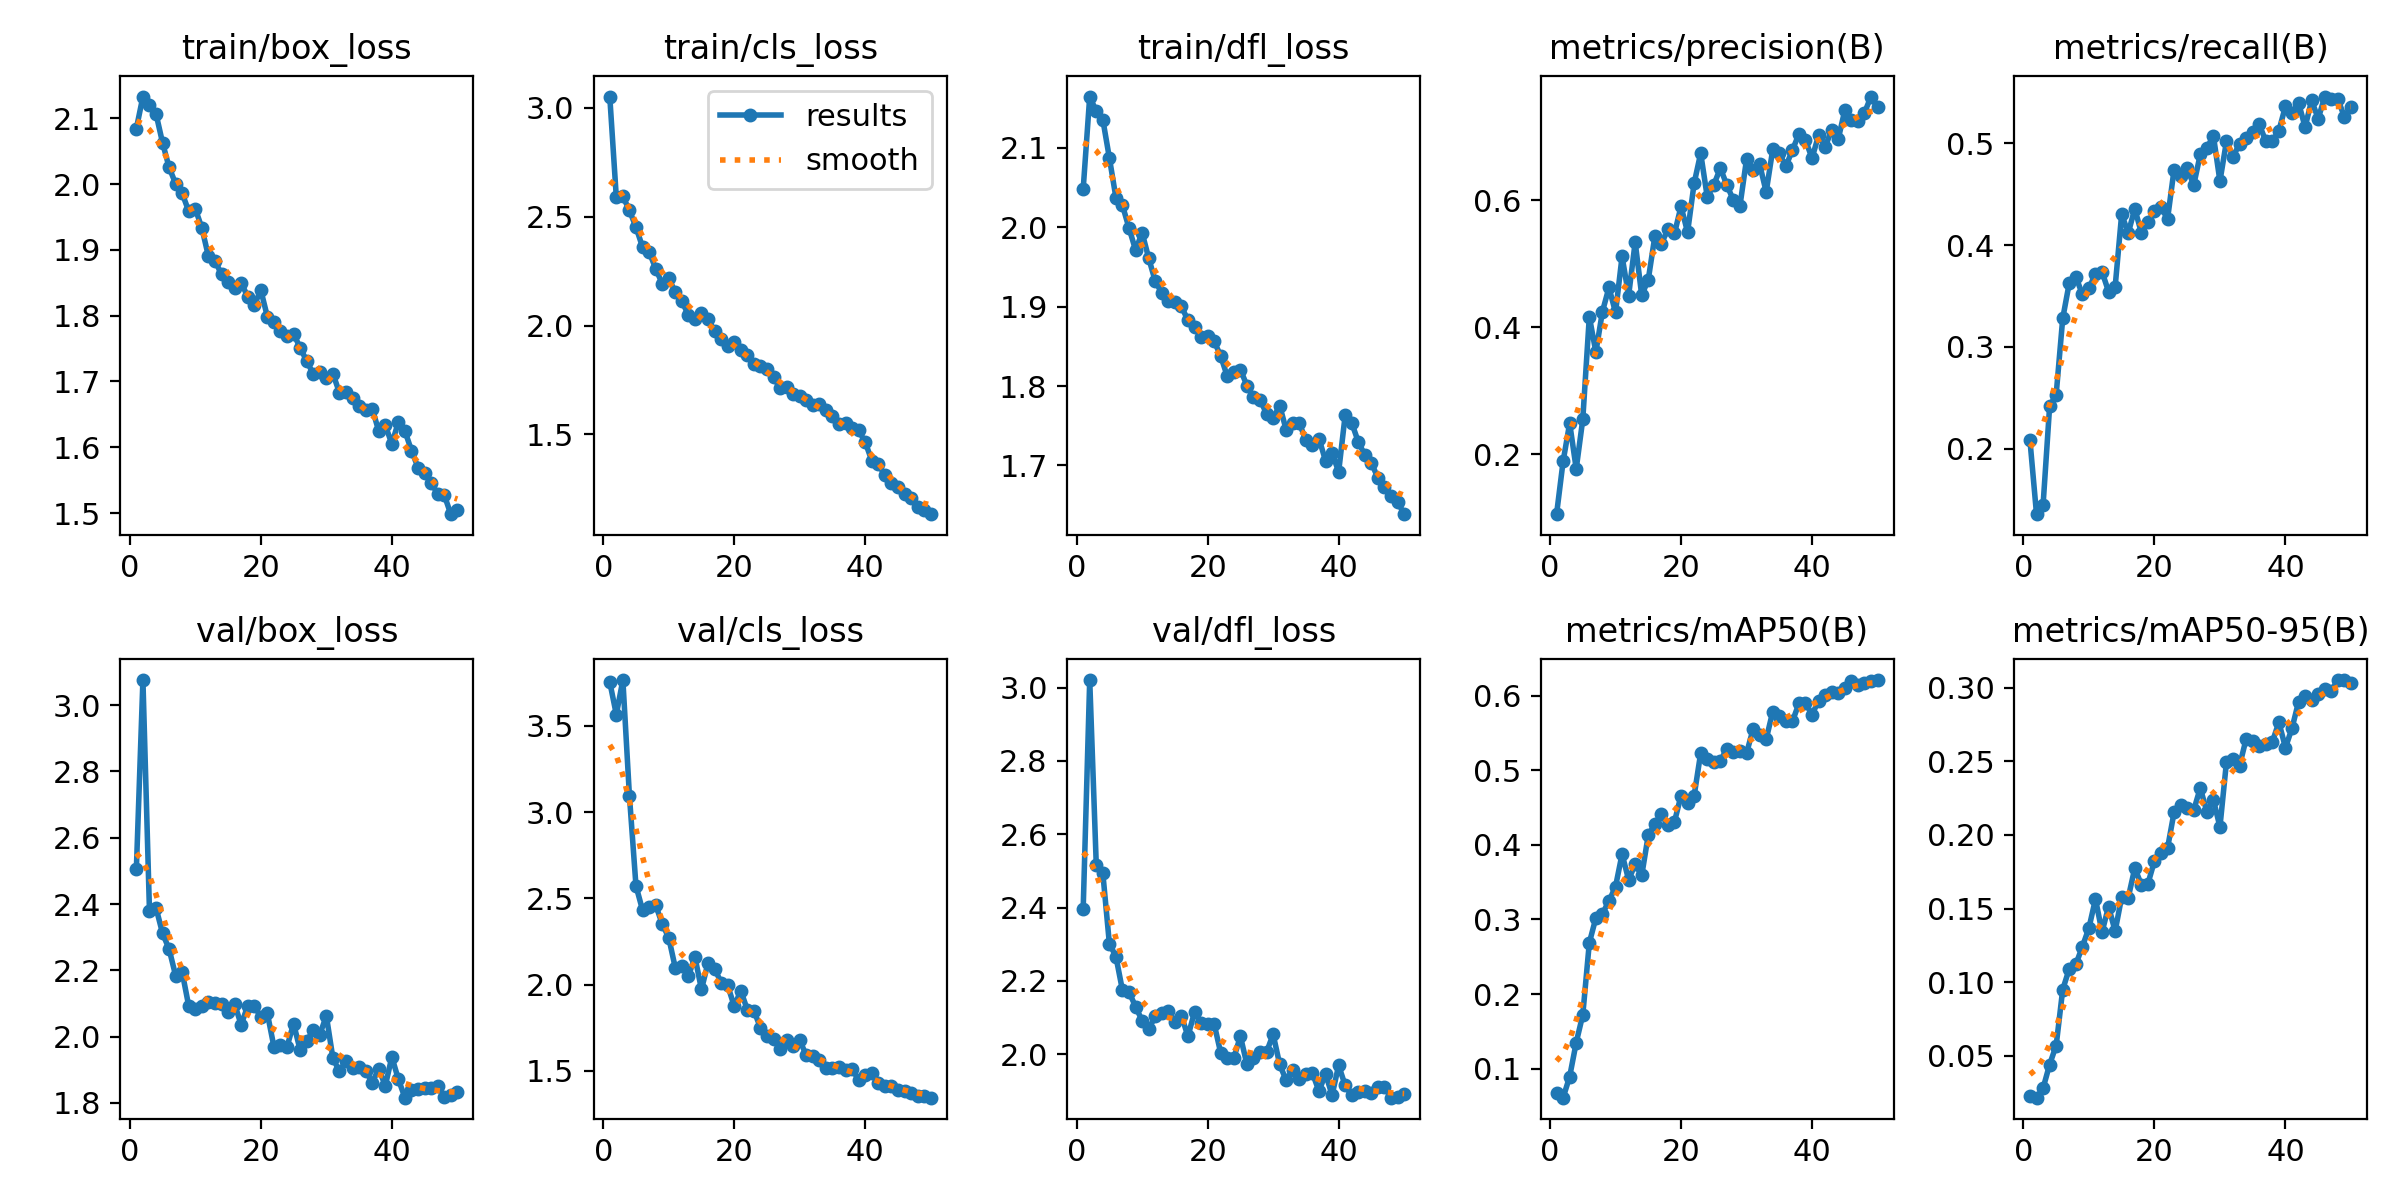

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


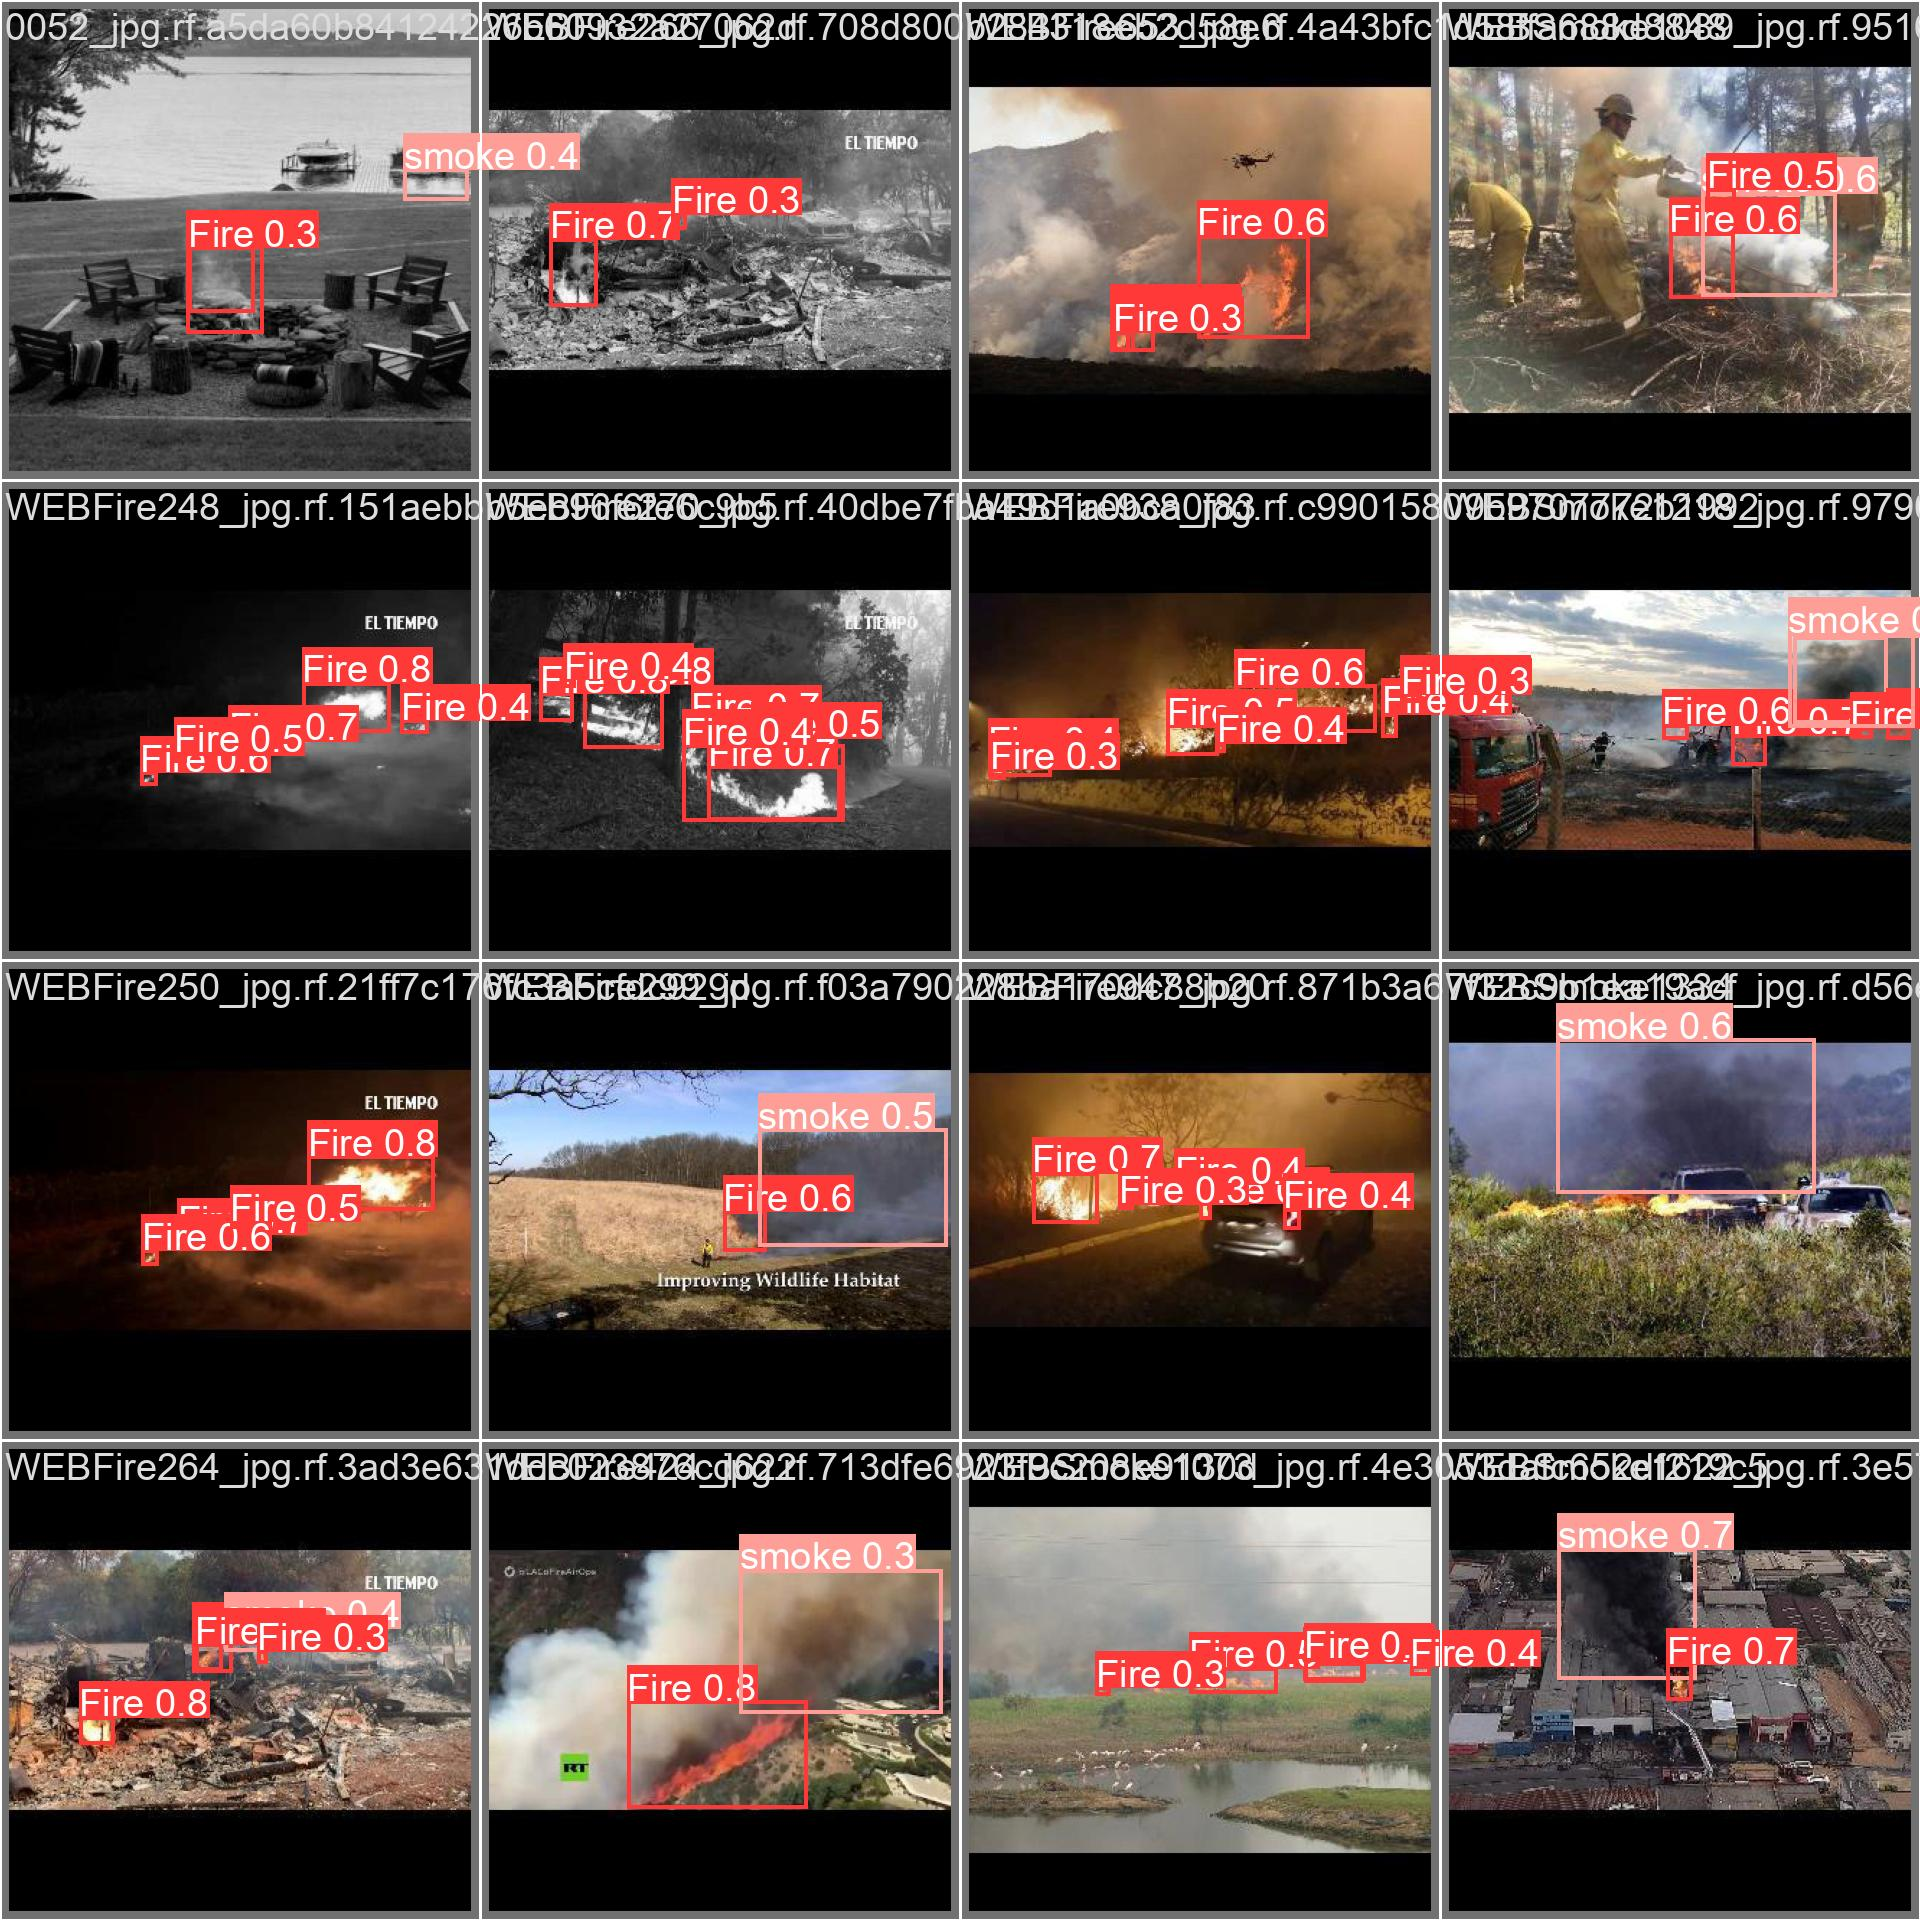

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Wildfire-Detection-3/valid/labels.cache... 748 images, 2 backgrounds, 0 corrupt: 100% 748/748 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/47 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 47/47 [00:19<00:00,  2.38it/s]
                   all        748       1530      0.766      0.509      0.597      0.297
                  Fire        748       1266      0.784      0.603      0.682      0.338
                 smoke        748        264      0.747      0.415      0.513      0.256
Speed: 1.4ms preprocess, 13.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/267 /content/datasets/Wildfire-Detection-3/test/images/0074_JPG_jpg.rf.6582f5ee7ec92b9a1f198dd3c892c715.jpg: 800x800 3 Fires, 1 smoke, 22.5ms
image 2/267 /content/datasets/Wildfire-Detection-3/test/images/0078_jpg.rf.9b8c111d5fae1e1e01a30636e8f7cf78.jpg: 800x800 1 Fire, 22.5ms
image 3/267 /content/datasets/Wildfire-Detection-3/test/images/00980a5f319aec67_jpg.rf.57ce061d6fed0ee2eec80bf6389f9710.jpg: 800x800 2 Fires, 22.7ms
image 4/267 /content/datasets/Wildfire-Detection-3/test/images/0101_jpg.rf.5723175d741bcf5e995bd85ab7dfccd4.jpg: 800x800 (no detections), 22.6ms
image 5/267 /content/datasets/Wildfire-Detection-3/test/images/0102_jpg.rf.6527a48f4fd6f6fe27cc7fe7b4d7e939.jpg: 800x800 (no detections), 22.5ms
image 6/267 /content/datasets/Wildfire-Detection-3/test/images/0103_jpg.rf.adfe540ab122a7251c5ce

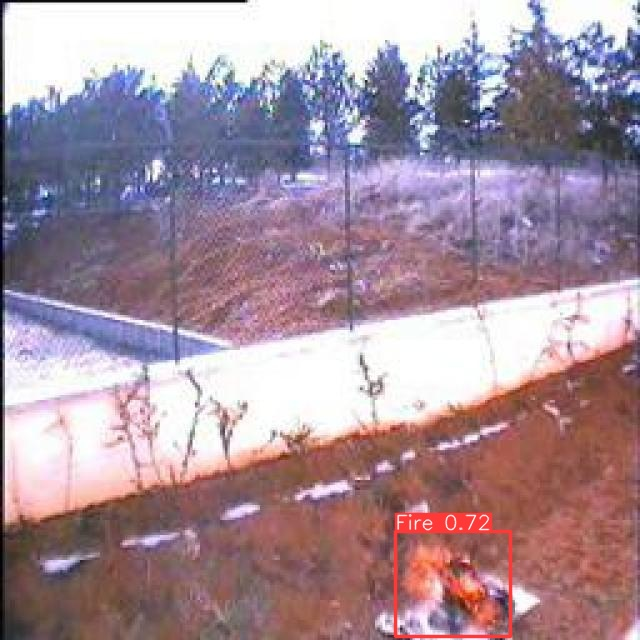

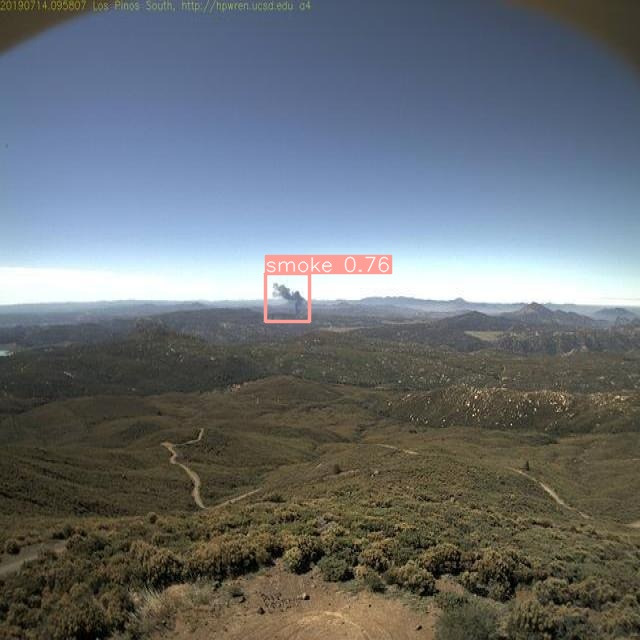

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))
      print("\n")